## Spectral clustering


<font size ="3">
Spectral clustering is a technique with roots in graph theory, where the approach is used to identify communities of nodes in a graph based on the edges connecting them. The method is flexible and allows us to cluster non graph data as well.
<br>
    
Spectral clustering uses information from the eigenvalues (spectrum) of special matrices built from the graph or the data set. We’ll learn how to construct these matrices, interpret their spectrum, and use the eigenvectors to assign our data to clusters.
</font>

## Eigenvectors and Eigenvalues

<font color ="blue">https://towardsdatascience.com/spectral-clustering-aba2640c0d5b</font>

In [8]:
from sklearn import cluster
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.misc import imresize
import matplotlib.pylab as pylab
import warnings
import numpy as np

In [19]:
warnings.filterwarnings('ignore')
im = imresize(imread('./images/input/lena.jpg'), (100,100,3))
img = rgb2gray(im)

In [20]:
k = 2 # binary segmentation, with 2 output clusters / segments
X = np.reshape(im, (-1, im.shape[-1]))

In [21]:
two_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10)
two_means.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=3, random_state=10, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [22]:
y_pred = two_means.predict(X)
labels = np.reshape(y_pred, im.shape[:2])

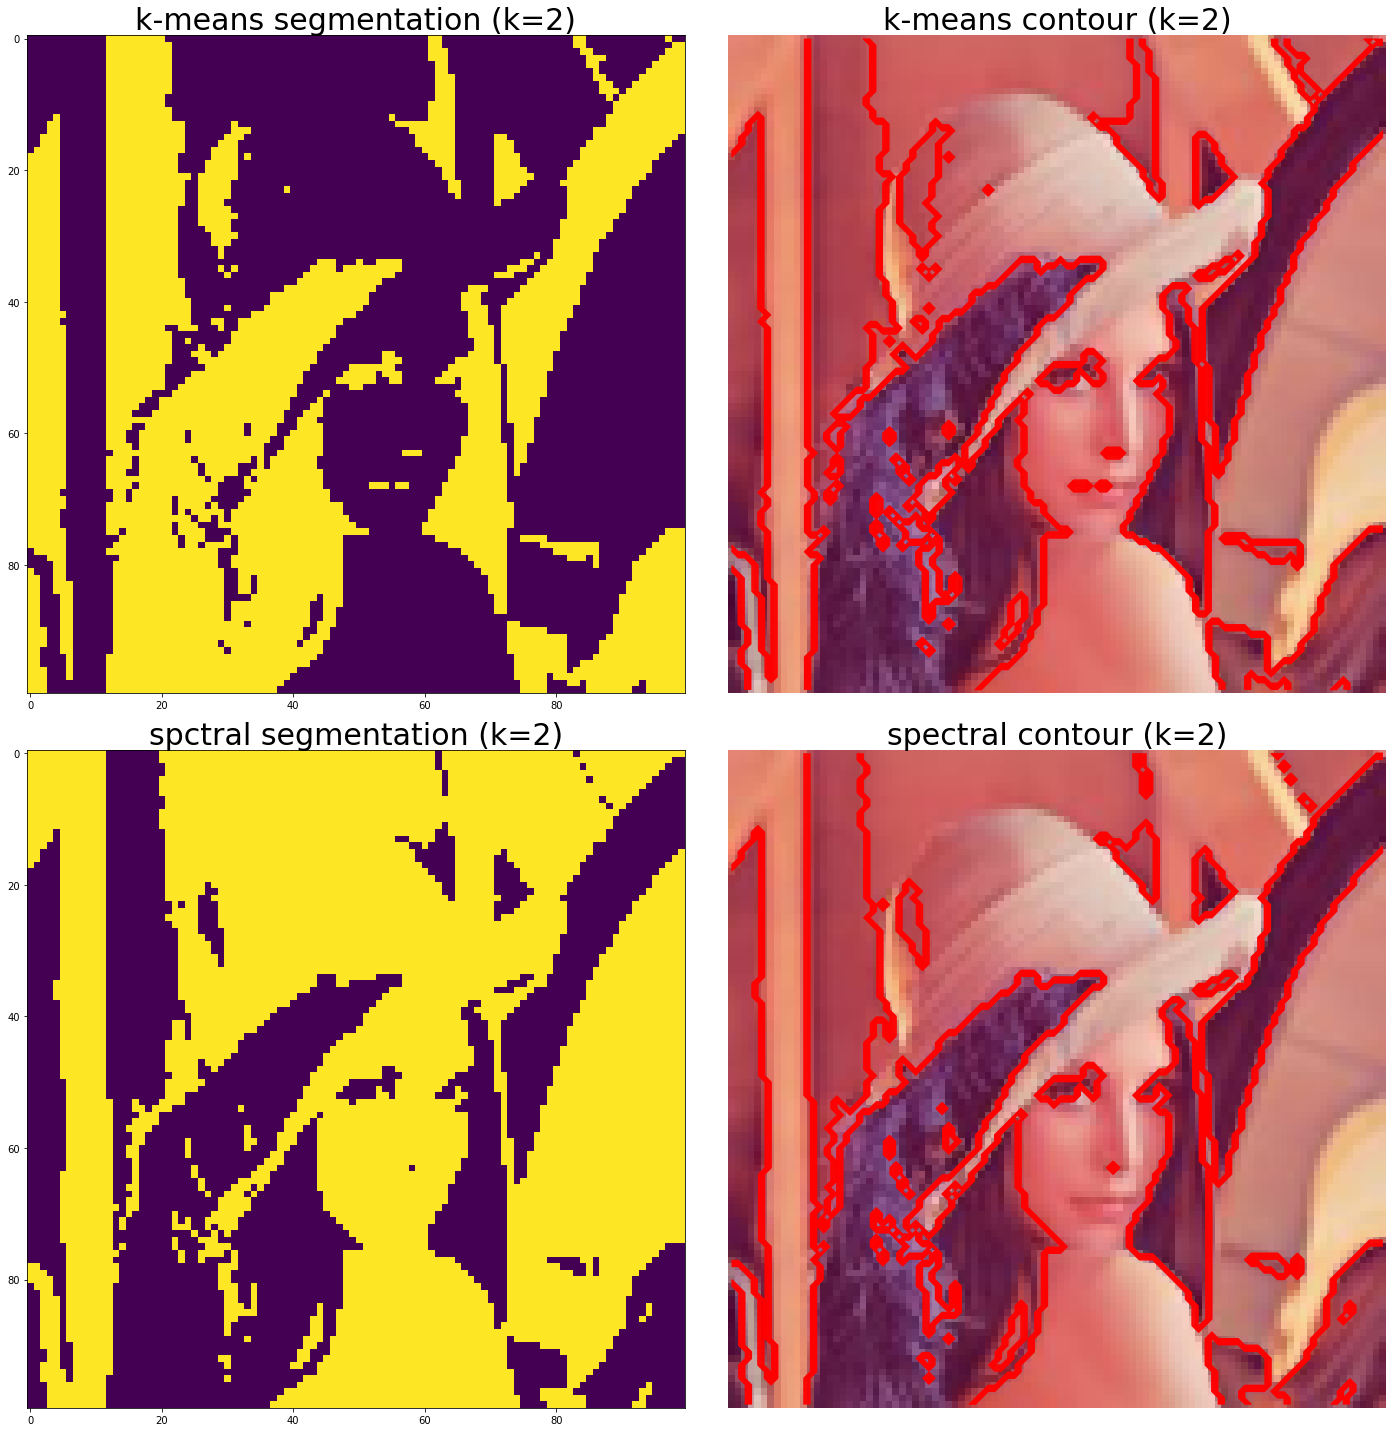

In [23]:
pylab.figure(figsize=(20,20))
pylab.subplot(221), pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('k-means segmentation (k=2)', size=30)
pylab.subplot(222), pylab.imshow(im), pylab.contour(labels == 0, contours=1, colors='red'), pylab.axis('off')
pylab.title('k-means contour (k=2)', size=30)
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors", n_neighbors=100, random_state=10)
spectral.fit(X) 
y_pred = spectral.labels_.astype(np.int)
labels = np.reshape(y_pred, im.shape[:2])
pylab.subplot(223), pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('spctral segmentation (k=2)', size=30)
pylab.subplot(224), pylab.imshow(im), pylab.contour(labels == 0, contours=1, colors='red'), pylab.axis('off'), pylab.title('spectral contour (k=2)', size=30), pylab.tight_layout()
pylab.show()

## PCA and eigenfaces 

<font size = "3">

Principal Component Analysis (PCA) is a statistical/unsupervised machine learning technique that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components, thereby finding the maximum directions of variances in the dataset (along the principal components).

This can be used for (linear) dimensionality reduction (only a few dominant principal components captures almost all of the variance in a dataset most of the time) and visualization (in 2D) of datasets having many dimensions. One application of PCA is eigenfaces, to find a set of faces that can (theoretically) represent any face (as a linear combination of those eigenfaces).

</font>

## Dimension reduction and visualization with PCA

In [25]:
import numpy as np
import matplotlib.pylab as plt 
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

(1797, 64)


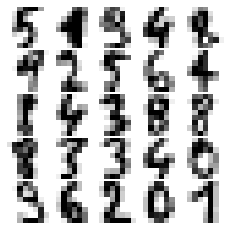

In [26]:
digits = load_digits() 
#print(digits.keys())
print(digits.data.shape)
j = 1
np.random.seed(1)
fig = plt.figure(figsize=(3,3)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
for i in np.random.choice(digits.data.shape[0], 25):
    plt.subplot(5,5,j), plt.imshow(np.reshape(digits.data[i,:], (8,8)), cmap='binary'), plt.axis('off')
    j += 1
plt.show()

## 2D projection and visualization

0.2850936482369702


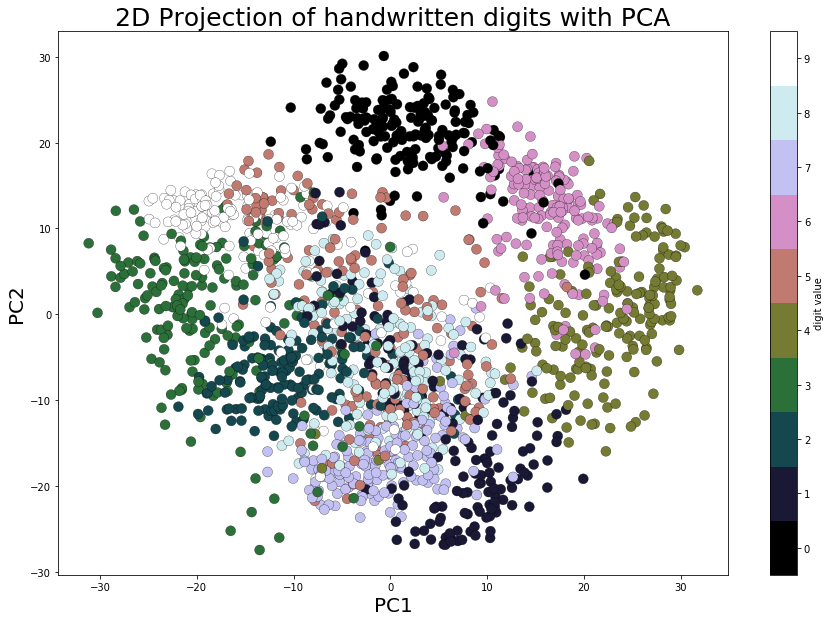

In [27]:
pca_digits=PCA(2)
digits.data_proj = pca_digits.fit_transform(digits.data) 
print(np.sum(pca_digits.explained_variance_ratio_))
# 0.28509364823696987
plt.figure(figsize=(15,10))
plt.scatter(digits.data_proj[:, 0], digits.data_proj[:, 1], lw=0.25, c=digits.target, edgecolor='k', s=100, cmap=plt.cm.get_cmap('cubehelix', 10))
plt.xlabel('PC1', size=20), plt.ylabel('PC2', size=20), plt.title('2D Projection of handwritten digits with PCA', size=25)
plt.colorbar(ticks=range(10), label='digit value')
plt.clim(-0.5, 9.5)

## Eigenfaces with PCA

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/tcs/scikit_learn_data
(400, 4096)


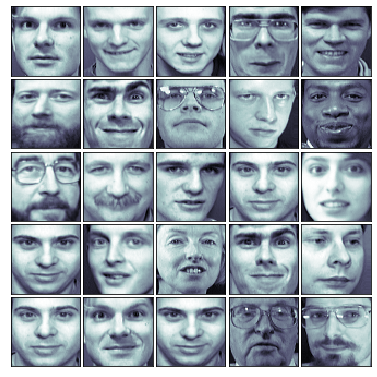

In [29]:
from sklearn.datasets import fetch_olivetti_faces 
faces = fetch_olivetti_faces().data
print(faces.shape) # there are 400 faces each of them is of 64x64=4096 pixels
fig = plt.figure(figsize=(5,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot 25 random faces
j = 1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25): 
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(faces[i,:],(64,64)), cmap=plt.cm.bone, interpolation='nearest') 
    j += 1
plt.show()

(400, 64)


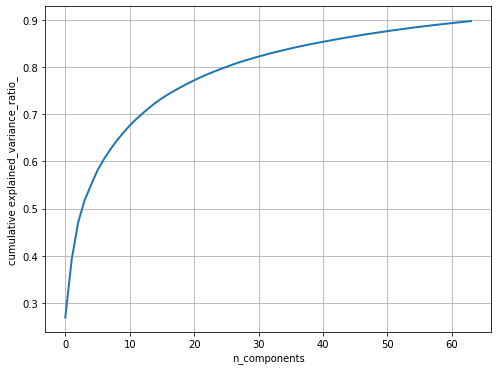

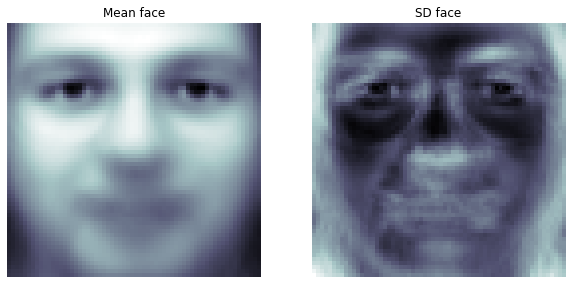

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
n_comp =64
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_comp))])
faces_proj = pipeline.fit_transform(faces)
print(faces_proj.shape)
# (400, 64)
mean_face = np.reshape(pipeline.named_steps['scaling'].mean_, (64,64))
sd_face = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (64,64))
pylab.figure(figsize=(8, 6))
pylab.plot(np.cumsum(pipeline.named_steps['pca'].explained_variance_ratio_), linewidth=2)
pylab.grid(), pylab.axis('tight'), pylab.xlabel('n_components'), pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show()
pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.imshow(mean_face, cmap=pylab.cm.bone), pylab.axis('off'), pylab.title('Mean face')
pylab.subplot(122), pylab.imshow(sd_face, cmap=pylab.cm.bone), pylab.axis('off'), pylab.title('SD face')
pylab.show()

## Eigenfaces

 Given the property of PCA, the PCs computed are orthogonal to each other and each of them contains 4,096 pixels—and can be reshaped to a 64 x 64 image. These principal components are known as eigenfaces (since they are also the eigenvectors).

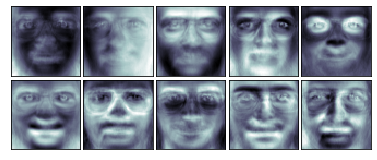

In [31]:
fig = plt.figure(figsize=(5,2)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the first 10 eigenfaces
for i in range(10): 
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pipeline.named_steps['pca'].components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

## Reconstruction

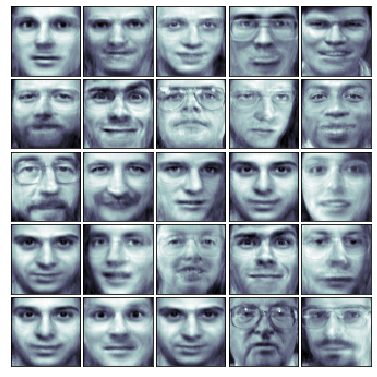

In [33]:
# face reconstruction
faces_inv_proj = pipeline.named_steps['pca'].inverse_transform(faces_proj) 
#reshaping as 400 images of 64x64 dimension 
fig = plt.figure(figsize=(5,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 dimension but 8x8 pixels 
j = 1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25):
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[]) 
    ax.imshow(mean_face + sd_face*np.reshape(faces_inv_proj,(400,64,64)) [i,:], cmap=plt.cm.bone, interpolation='nearest')
    j += 1

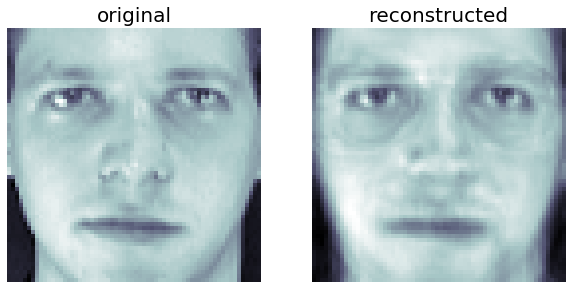

In [34]:
orig_face = np.reshape(faces[0,:], (64,64))
reconst_face = np.reshape(faces_proj[0,:]@pipeline.named_steps['pca'].components_, (64,64))
reconst_face = mean_face + sd_face*reconst_face
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(orig_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('original', size=20)
plt.subplot(122), plt.imshow(reconst_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('reconstructed', size=20)
plt.show()

## Eigen decomposition

Each face can be represented as a linear combination of the 64 eigenfaces. Each eigenface will have different weights (loadings) for different face image. The following screenshot shows how a face can be represented with the eigenfaces and shows the first few corresponding weights.The code is left as an exercise to the reader:

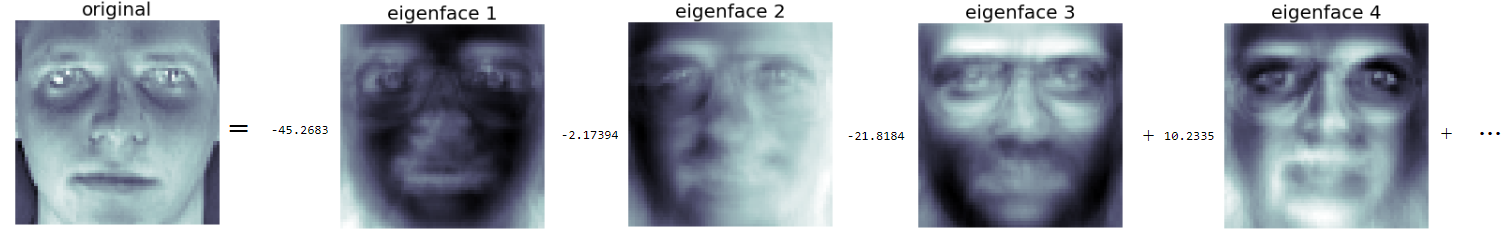

In [36]:
from IPython.display import Image
Image(filename='./images/input/eigan.png',width=300)